In [2]:
from PIL import Image
import numpy as np

In [11]:
label = Image.open("../sample_dataset/train/Labels/000003.png")
label_np = np.asarray(label)

In [12]:
print(label_np.shape)

(540, 960)


In [13]:
print(np.amax(label_np))

4


In [14]:
print(np.amin(label_np))

1


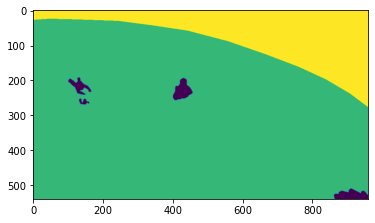

In [102]:
image = Image.open("../sample_dataset/train/Images/000003.jpg")
label = Image.open("../sample_dataset/train/Labels/000003.png")

plt.imshow(label)
# Concatenate image and label, to apply same transformation on both
image_np = np.asarray(image)
label_np = np.asarray(label)
new_shape = (image_np.shape[0], image_np.shape[1], image_np.shape[2] + 1)
image_and_label_np = np.zeros(new_shape, image_np.dtype)
image_and_label_np[:, :, 0:3] = image_np
image_and_label_np[:, :, 3] = label_np

# Convert to PIL
image_and_label = Image.fromarray(image_and_label_np)

In [92]:
from torchvision.transforms import InterpolationMode
from torchvision import transforms
transforms = transforms.Compose([
                    #transforms.RandomHorizontalFlip(),
                    #transforms.RandomVerticalFlip(),
                    transforms.Resize((512,512), interpolation=InterpolationMode.NEAREST),
                    transforms.ToTensor()
                    #transforms.Normalize([0.485, 0.456, 0.406, 0], [0.229, 0.224, 0.225, 1])
            ])

In [93]:

# Apply Transforms
image_and_label = transforms(image_and_label)
image_and_label = image_and_label * 255

# Extract image and label
image = image_and_label[0:3, :, :]
label = image_and_label[3, :, :].unsqueeze(0)

In [94]:
print(image)
print(label)

tensor([[[152., 153., 153.,  ...,  31.,  29.,  30.],
         [153., 154., 154.,  ...,  30.,  29.,  30.],
         [154., 154., 154.,  ...,  30.,  29.,  31.],
         ...,
         [125., 114., 126.,  ..., 205., 190., 181.],
         [109., 111., 119.,  ..., 203., 208., 168.],
         [110., 108., 117.,  ..., 204., 203., 202.]],

        [[183., 182., 182.,  ...,  83.,  78.,  79.],
         [184., 183., 183.,  ...,  82.,  78.,  79.],
         [183., 183., 183.,  ...,  82.,  78.,  80.],
         ...,
         [125., 114., 123.,  ..., 214., 201., 192.],
         [109., 111., 116.,  ..., 212., 217., 179.],
         [110., 108., 114.,  ..., 213., 212., 213.]],

        [[188., 188., 188.,  ..., 122., 118., 119.],
         [189., 189., 189.,  ..., 121., 118., 119.],
         [189., 189., 189.,  ..., 121., 118., 120.],
         ...,
         [117., 106., 116.,  ..., 223., 207., 198.],
         [101., 103., 109.,  ..., 221., 224., 185.],
         [102., 100., 107.,  ..., 222., 219., 219.]]]

In [96]:

# Normalize back from [0, 1] to [0, 255]
# label = label * 255
#  Convert to int64 and remove second dimension
label = label.long().squeeze()
image = image.long()

In [97]:
print(label)
print(image)

tensor([[4, 4, 4,  ..., 4, 4, 4],
        [4, 4, 4,  ..., 4, 4, 4],
        [4, 4, 4,  ..., 4, 4, 4],
        ...,
        [3, 3, 3,  ..., 1, 1, 1],
        [3, 3, 3,  ..., 1, 1, 1],
        [3, 3, 3,  ..., 1, 1, 1]])
tensor([[[152, 153, 153,  ...,  31,  29,  30],
         [153, 154, 154,  ...,  30,  29,  30],
         [154, 154, 154,  ...,  30,  29,  31],
         ...,
         [125, 114, 126,  ..., 205, 190, 181],
         [109, 111, 119,  ..., 203, 208, 168],
         [110, 108, 117,  ..., 204, 203, 202]],

        [[183, 182, 182,  ...,  83,  78,  79],
         [184, 183, 183,  ...,  82,  78,  79],
         [183, 183, 183,  ...,  82,  78,  80],
         ...,
         [125, 114, 123,  ..., 214, 201, 192],
         [109, 111, 116,  ..., 212, 217, 179],
         [110, 108, 114,  ..., 213, 212, 213]],

        [[188, 188, 188,  ..., 122, 118, 119],
         [189, 189, 189,  ..., 121, 118, 119],
         [189, 189, 189,  ..., 121, 118, 120],
         ...,
         [117, 106, 116,  ..., 

In [98]:
image.shape

torch.Size([3, 512, 512])

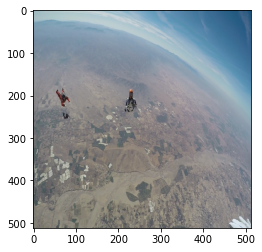

In [99]:
import matplotlib.pyplot as plt
plt.imshow(image.permute(1, 2, 0))

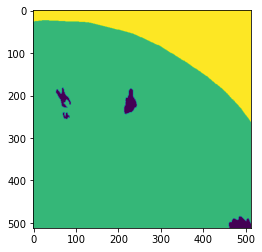

In [101]:
label.shape
plt.imshow(label)

In [47]:
!pip3 install --upgrade Pillow --user

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ktrain 0.28.3 requires scikit-learn==0.23.2, but you have scikit-learn 1.3.1 which is incompatible.


In [3]:
import os
import glob
data_dir = "../sample_dataset"
os.path.join(data_dir, "train")

'../sample_dataset\\train'

In [10]:
x = "val"
data_dir = "../sample_dataset"
folder_path = os.path.join(data_dir, x)
img_files = glob.glob(os.path.join(folder_path + f"/{x}-org-img", '*.*'))
label_files = []
for img_path in img_files:
    image_filename, _ = os.path.splitext(os.path.basename(img_path))
    label_filename_with_ext = f"{image_filename}_lab.png"
    label_files.append(os.path.join(folder_path+ f"/{x}-label-img", label_filename_with_ext))

In [11]:
print(img_files)
print(label_files)

['../sample_dataset\\val/val-org-img\\000077.jpg', '../sample_dataset\\val/val-org-img\\000093.jpg']
['../sample_dataset\\val/val-label-img\\000077_lab.png', '../sample_dataset\\val/val-label-img\\000093_lab.png']


In [6]:
os.path.join(folder_path + f"/{x}-org-img", '*.*')

'../sample_dataset\\train/train-org-img\\*.*'

In [16]:
import glob
import os

mode = "test"
folder_path = "../example_forest"
img_files = glob.glob(os.path.join(folder_path, 'input', mode, '*.*'))

# get all targets (GT)
label_files = []
for img_path in img_files:
    image_filename, _ = os.path.splitext(os.path.basename(img_path))
    image_filename = image_filename.split('_', 1)
    label_filename_with_ext = f"target_{image_filename[1]}.tif"
    label_files.append(os.path.join(folder_path, 'target', mode, label_filename_with_ext))

In [17]:
img_files

['../example_forest\\input\\test\\input_2280_1992.tif',
 '../example_forest\\input\\test\\input_2281_1992.tif',
 '../example_forest\\input\\test\\input_2282_1992.tif']

In [18]:
label_files

['../example_forest\\target\\test\\target_2280_1992.tif',
 '../example_forest\\target\\test\\target_2281_1992.tif',
 '../example_forest\\target\\test\\target_2282_1992.tif']